# DAPGEO-02 Well Logs

In [4]:
import lasio , os  
import numpy as np    
import pandas as pd   

import matplotlib as mpl  
import matplotlib.pyplot as plt

%matplotlib inline   

In [5]:
# This function converts null values to NaN
# E.g. null = -9999.25 > Type <print(lasfile.well)> to find out this value
def valtonan(inp, val=-99999.000000):
    """Convert all 'val' to NaN's."""
    inp[inp==val] = np.nan
    return inp

#This function makes for cleaner axis plotting
def remove_last(ax, which='upper'):
    """Remove <which> from x-axis of <ax>.
    which: 'upper', 'lower', 'both'
    """
    nbins = len(ax.get_xticklabels())
    ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=nbins, prune=which))

#This function smoothes the curves for better visualization
def smooth(data, window_len=10):
    """Smooth the data using a window with requested size."""
    s_p = np.r_[2*data[0]-data[window_len:1:-1],
                data, 2*data[-1]-data[-1:-window_len:-1]]
    w_p = np.ones(window_len, 'd')
    y_p = np.convolve(w_p/w_p.sum(), s_p, mode='same')
    return y_p[window_len-1:-window_len+1]


## Phase 2
LAS files version 3 cannot be read by the _lasio_ package. Therefore, measurements were saved in independent _CSV_ files because depth  measurements are not the same. 

_TODO: automate this process of extracting the log from the las file and create a csv with the selected logs._

__Note__: These are raw measurements and must be analysed to filter/remove data outliers.

In [6]:
# LAS files from phase 2 are version 3 and cannot be read by lasio. 
#p2 = lasio.read(os.path.join("logs/DAPGEO-02_500m_PHASE2_RES_IP_SGR.las"))

In [9]:
p2_kut = pd.read_csv('../data/interim/phase2_GR_K_U_T.csv')
p2_kut

,DEPTH.M,GR.API,K.%,U.PPM,TH.PPM
0,42.5016,57.9220,0.374637,2.536620,0.000000
1,42.5515,74.0309,0.394387,1.645930,5.337020
2,42.6014,54.7021,0.229890,2.685000,0.000000
3,42.6513,54.4915,1.111340,0.000000,0.884902
4,42.7012,54.8499,0.844439,0.000000,1.505940
...,...,...,...,...,...
3721,228.2000,105.6880,0.693402,0.000000,15.399100
3722,228.2500,101.5200,0.526911,1.178930,8.456170
3723,228.3000,99.4096,1.207060,2.953820,1.303200
3724,228.3500,97.4727,0.815284,0.810538,4.242170


Calculating predefined aggregated statistics allows to spot outliers. Indeed, the minimum value in gamma ray of -99999.000000 is an invalid measurement, which can also be seen in the plot as spikes.

In [10]:
p2_kut[['GR.API','K.%','U.PPM','TH.PPM']].describe()

,GR.API,K.%,U.PPM,TH.PPM
count,3726.000000,3726.000000,3726.000000,3726.000000
mean,-303.243237,0.367906,0.913498,2.429941
std,5899.935151,0.398040,1.245371,3.016934
min,-99999.000000,0.000000,0.000000,0.000000
25%,30.262975,0.000000,0.000000,0.000000
50%,38.537700,0.258015,0.270104,1.341070
75%,54.498625,0.578825,1.550358,4.007132
max,138.384000,2.985270,10.135700,20.594600


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

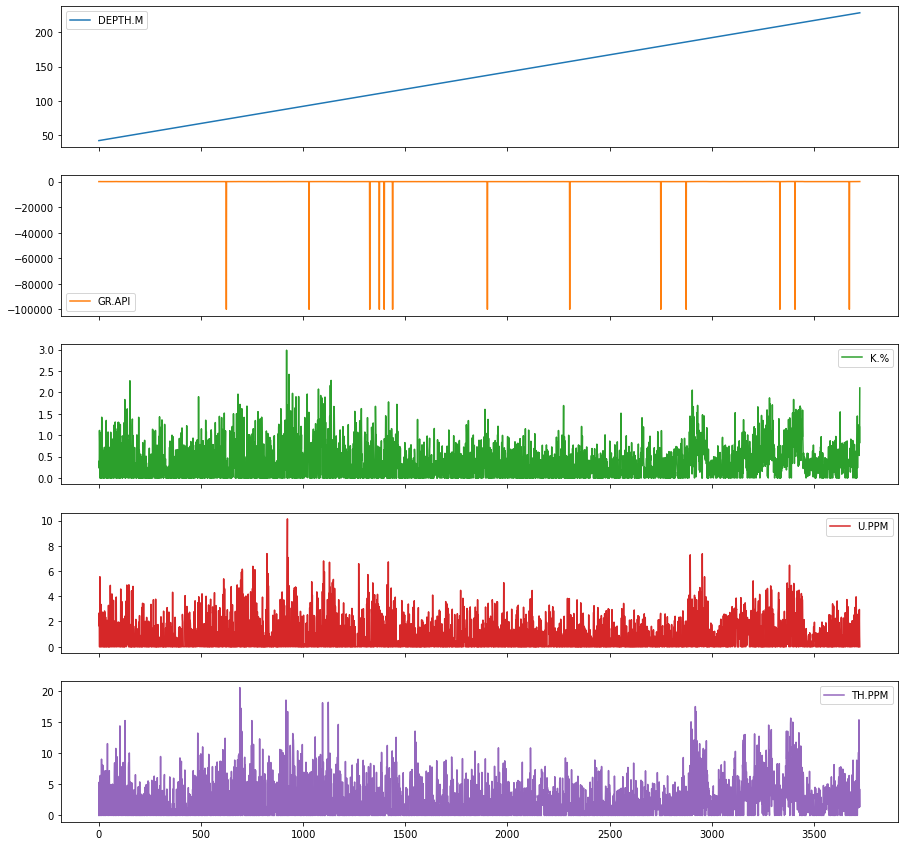

In [11]:
p2_kut.plot(subplots=True, figsize=(15, 15))

## Gamma Ray correction
We convert it to a NaN number using the funciton valtonan and plot it.

In [12]:
p2_kut['GR.API']=valtonan(p2_kut['GR.API'])

In [13]:
names=p2_kut.keys()
names

Index(['DEPTH.M', 'GR.API', 'K.%', 'U.PPM', 'TH.PPM'], dtype='object')

## Smoothing logs

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

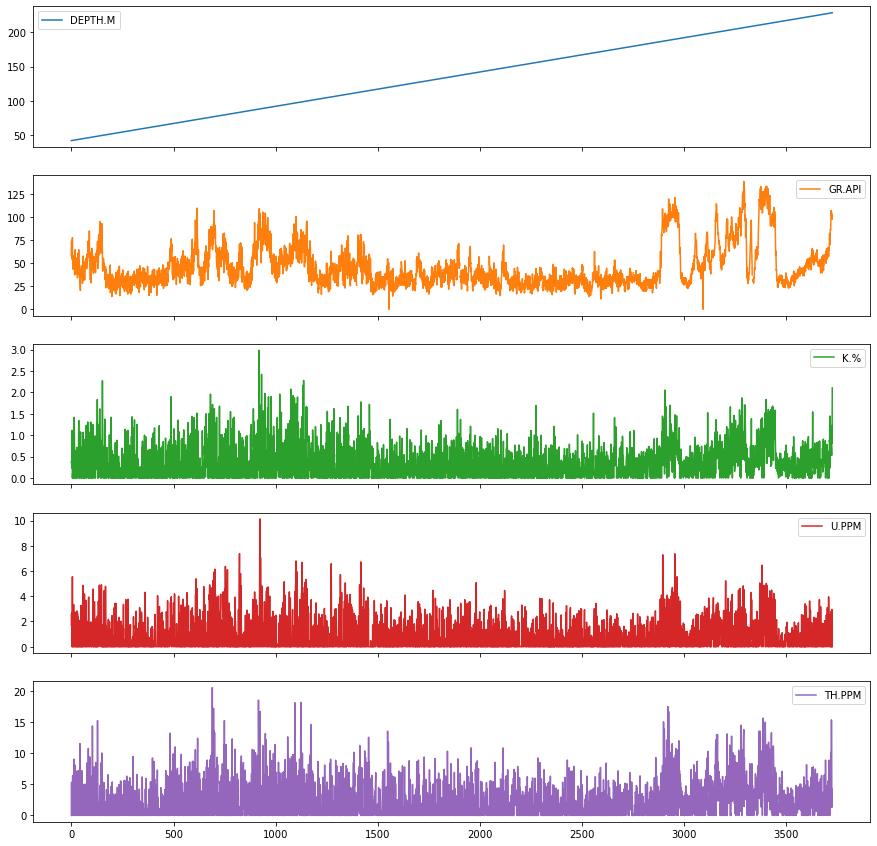

In [49]:
k = smooth(p2_kut['K.%'].values, window_len=5)
u = smooth(p2_kut['U.PPM'].values, window_len=10)
t = smooth(p2_kut['TH.PPM'].values, window_len=10)
p2_kut.plot(subplots=True, figsize=(15, 15))

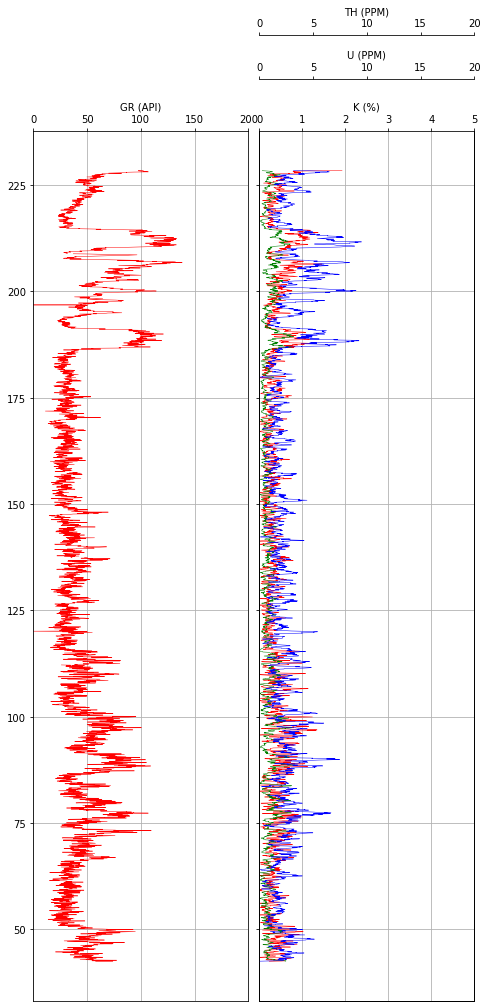

In [48]:
f0, ax1 = plt.subplots(figsize=(16,16))
#curve_names = ['Gamma', 'Deep Res', 'Density', 'Neutron']
#Set up the plot axes
ax1 = plt.subplot2grid((1,4), (0,0), rowspan=1, colspan = 1) 
ax2 = plt.subplot2grid((1,4), (0,1), rowspan=1, colspan = 1)
#ax3 = plt.subplot2grid((1,4), (0,2), rowspan=1, colspan = 1)
#ax4 = plt.subplot2grid((1,4), (0,3), rowspan=1, colspan = 1)
ax3 = ax2.twiny()
ax4 = ax2.twiny()

#Set up the individual log tracks / subplots

#ax1.plot(p2_kut['GR.API'], p2_kut['DEPTH.M'], color = "red", lw = 0.5)
ax1.plot(p2_kut['GR.API'], p2_kut['DEPTH.M'], color = "red", lw = 0.5)
ax1.set_xlim(0, 200)
ax1.set_xlabel('GR (API)')

ax2.plot(k, p2_kut['DEPTH.M'], color = "red", lw = 0.5)
ax2.set_xlim(0, 5)
ax2.set_xlabel('K (%)')

ax3.plot(u, p2_kut['DEPTH.M'], color = "green", lw = 0.5)
ax3.set_xlim(0, 20)
ax3.set_xlabel('U (PPM)')

ax4.plot(t, p2_kut['DEPTH.M'], color = "blue", lw = 0.5)
ax4.set_xlim(0, 20)
ax4.set_xlabel('TH (PPM)')

#Set up the common elements between the subplots
for i, ax in enumerate(f0.axes):
    #ax.set_ylim(0, 250) # Set the depth range
    
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")
    
    if i >= 2:
        ax.spines["top"].set_position(("axes", 0.96+(i/20)))
    else:
        ax.grid()

#Hide tick labels on the y-axis 
for ax in [ax2, ax3, ax4]:
    plt.setp(ax.get_yticklabels(), visible = False)

#Reduce the space between each subplot
f0.subplots_adjust(wspace = 0.05)


## Resistivity and SGR Logs
to do

## Phase 3


In [38]:
# Load LAS files from phase 3 (.las version 2)
p3_vpvs = lasio.read(os.path.join('../data/raw/DAPGEO-02_500m_PHASE3_VPVS_processed.las'))

In [39]:
print(p3_vpvs.curves)

Mnemonic        Unit  Value  Description     
--------        ----  -----  -----------     
DEPT            M            DEPTH           
V_P-WAVE_SONIC  M/S          V P-wave Sonic  
V_P-WAVE_PS     M/S          V P-wave PS     
V_S-WAVE_PS_1   M/S          V S-wave PS_1   
V_S-WAVE_PS_2   M/S          V S-wave PS_2   


In [40]:
p3_vpvs.keys() 

['DEPT', 'V_P-WAVE_SONIC', 'V_P-WAVE_PS', 'V_S-WAVE_PS_1', 'V_S-WAVE_PS_2']

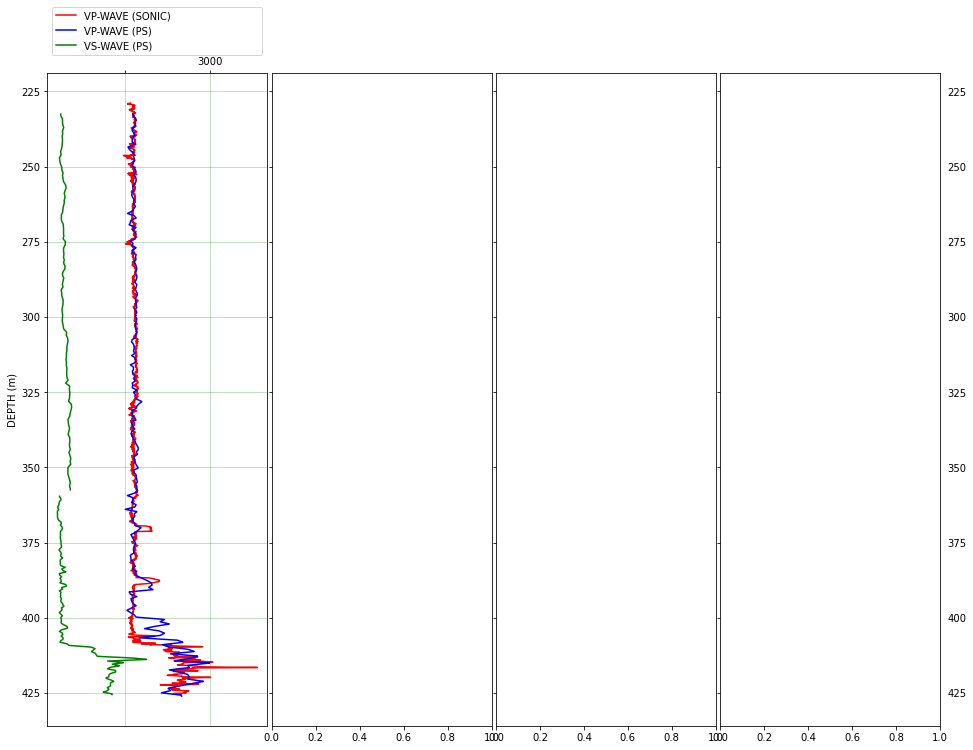

In [41]:
# Plotting Velocity curves along well total depth

f2, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize=(16,12))
f2.subplots_adjust(wspace=0.02)
plt.gca().invert_yaxis()

# So that y-tick labels appear on left and right
plt.tick_params(labelright=True)

# Change tick-label globally
mpl.rcParams['xtick.labelsize'] = 10

ax1.plot(p3_vpvs['V_P-WAVE_SONIC'], p3_vpvs['DEPT'],'r', label='VP-WAVE (SONIC)')
ax1.plot(p3_vpvs['V_P-WAVE_PS'], p3_vpvs['DEPT'],'b', label='VP-WAVE (PS)')
ax1.plot(p3_vpvs['V_S-WAVE_PS_1'], p3_vpvs['DEPT'], 'g', label='VS-WAVE (PS)')
ax1.plot(p3_vpvs['V_S-WAVE_PS_2'], p3_vpvs['DEPT'], 'g')
ax1.xaxis.tick_top()
#ax1.xaxis.set_label_position('top') 
#ax1.set_xlabel()
ax1.set_ylabel('DEPTH (m)')
ax1.grid(True, c="g", alpha=0.3)
ax1.legend(bbox_to_anchor=(0.,1.1,1.,0.01), mode="expand")
plt.setp(ax1.get_xticklabels()[1::2], visible=False)  # Hide every second tick-label
remove_last(ax1)  # remove last value of x-ticks, see function defined in first cell

plt.show()


## Phase 4

In [43]:
# Load LAS files from phase 4
p4_vs = lasio.read(os.path.join('../data/raw/DAPGEO-02_500m_PHASE4_VS_processed.las'))
print(p4_vs.curves)

Mnemonic     Unit  Value  Description  
--------     ----  -----  -----------  
DEPT         M            DEPTH        
GR           API          GR           
V_S-WAVE_PS  M/S          V S-wave PS  


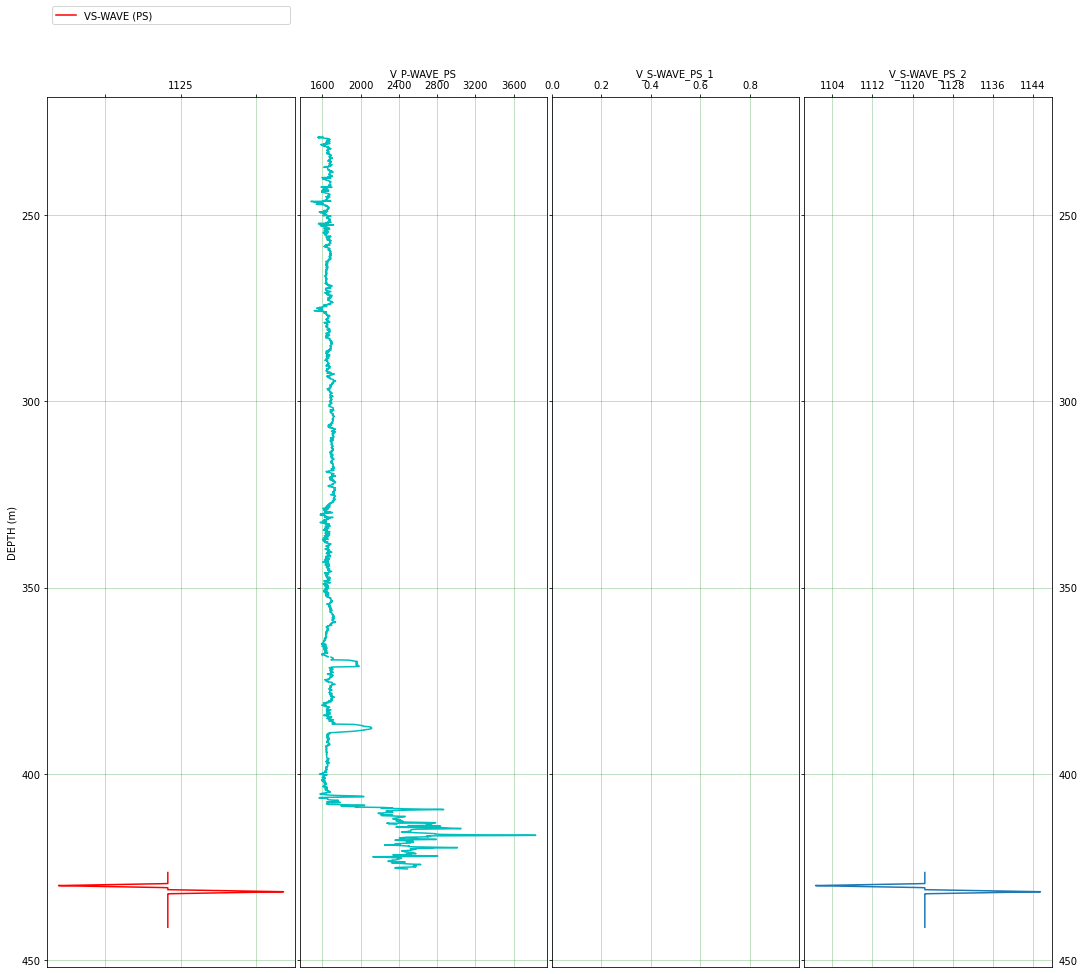

In [44]:
# Plotting curves along well total depth

f3, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize=(18,16))
f3.subplots_adjust(wspace=0.02)
plt.gca().invert_yaxis()

# So that y-tick labels appear on left and right
plt.tick_params(labelright=True)

# Change tick-label globally
mpl.rcParams['xtick.labelsize'] = 10

ax1.plot(p4_vs['V_S-WAVE_PS'], p4_vs['DEPT'],'r', label='VS-WAVE (PS)')
ax1.xaxis.tick_top()
#ax1.xaxis.set_label_position('top') 
#ax1.set_xlabel()
ax1.set_ylabel('DEPTH (m)')
ax1.grid(True, c="g", alpha=0.3)
ax1.legend(bbox_to_anchor=(0.,1.1,1.,0.01), mode="expand")
plt.setp(ax1.get_xticklabels()[1::2], visible=False)  # Hide every second tick-label
remove_last(ax1)  # remove last value of x-ticks, see function defined in first cell

ax2.plot(p3_vpvs['V_P-WAVE_SONIC'], p3_vpvs['DEPT'],'c', label='')
ax2.set_xlabel('V_P-WAVE_PS',va = 'top')
ax2.xaxis.tick_top()
ax2.xaxis.set_label_position('top')
ax2.grid(True, c="g", alpha=0.3)
remove_last(ax2)  


ax3.set_xlabel('V_S-WAVE_PS_1',va = 'top')
ax3.xaxis.tick_top()
ax3.xaxis.set_label_position('top')
ax3.grid(True, c="g", alpha=0.3) 
remove_last(ax3) 


ax4.plot(p4_vs['V_S-WAVE_PS'], p4_vs['DEPT'])
ax4.set_xlabel('V_S-WAVE_PS_2')
ax4.xaxis.tick_top()
ax4.xaxis.set_label_position('top')
ax4.grid(True, c="g", alpha=0.3) 
remove_last(ax4)  

plt.show()


In [45]:
p4_kut = lasio.read(os.path.join('../data/raw/DAPGEO-02_500m_PHASE4_SGR.las'))

In [46]:
p4_kut.keys() 

['DEPT',
 'TIME_ENC',
 'SPEED_ENC',
 'TENSION_TEN',
 'ETIME_SGR',
 'K_SGR',
 'U_SGR',
 'TH_SGR',
 'KTH_SGR',
 'GAMMA_SGR',
 'GRS_SGR']